<a href="https://colab.research.google.com/github/mantrala1/DataScienceprojects/blob/master/personal_loan_campaign_logistic_regression_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os as os
os.chdir('/Users/sriharithamantrala/Desktop/AIML/logistic_regression_supervised_learning')

loans = pd.read_csv(r'Loan_Modelling.csv')

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


In [ ]:
loans.shape

(5000, 14)

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
loans.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
loans.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
loans.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
data_columns=loans.columns

In [ ]:
# Print frequency distribution of all variables
for i in data_columns:
    if loans[i].dtype !='object':
        print(loans[i].value_counts(normalize=True))
        print("*" * 50)
      

2049    0.0002
1210    0.0002
3271    0.0002
1222    0.0002
3267    0.0002
         ...  
2604    0.0002
4651    0.0002
553     0.0002
2600    0.0002
2047    0.0002
Name: ID, Length: 5000, dtype: float64
**************************************************
35    0.0302
43    0.0298
52    0.0290
58    0.0286
54    0.0286
50    0.0276
41    0.0272
30    0.0272
56    0.0270
34    0.0268
39    0.0266
57    0.0264
59    0.0264
51    0.0258
60    0.0254
45    0.0254
46    0.0254
42    0.0252
31    0.0250
40    0.0250
55    0.0250
29    0.0246
62    0.0246
61    0.0244
44    0.0242
33    0.0240
32    0.0240
48    0.0236
49    0.0230
38    0.0230
47    0.0226
53    0.0224
63    0.0216
36    0.0214
37    0.0212
28    0.0206
27    0.0182
65    0.0160
64    0.0156
26    0.0156
25    0.0106
24    0.0056
66    0.0048
23    0.0024
67    0.0024
Name: Age, dtype: float64
**************************************************
 32    0.0308
 20    0.0296
 9     0.0294
 5     0.0292
 23    0.0288
 35    0.0286

In [ ]:
# Create enumerations for Education.
loans['Education'].value_counts()  
loans['Edu'] = loans['Education'].apply(lambda x : 'Undergrad' if x==1 else ('Grad' if x==2  else ('Advanced' if x==3 else 'Unknown')))
loans['Edu'].value_counts()


Undergrad    2096
Advanced     1501
Grad         1403
Name: Edu, dtype: int64

In [ ]:
# Observer distribution of loan accounts by family type
loans.groupby('Family').Personal_Loan.value_counts(normalize=True)

Family  Personal_Loan
1       0                0.927310
        1                0.072690
2       0                0.918210
        1                0.081790
3       0                0.868317
        1                0.131683
4       0                0.890344
        1                0.109656
Name: Personal_Loan, dtype: float64

In [ ]:
# Observe distribution of personal laon accounts by online account
loans.groupby('Online').Personal_Loan.value_counts(normalize=True)

Online  Personal_Loan
0       0                0.90625
        1                0.09375
1       0                0.90248
        1                0.09752
Name: Personal_Loan, dtype: float64

In [ ]:
# Observe distribution of other credit card accounts by personal laon.
loans.groupby('CreditCard').Personal_Loan.value_counts(normalize=True)

CreditCard  Personal_Loan
0           0                0.904533
            1                0.095467
1           0                0.902721
            1                0.097279
Name: Personal_Loan, dtype: float64

In [ ]:
# Observe Income median for personal loan customers
loans.groupby('Personal_Loan').Income.median()

Personal_Loan
0     59.0
1    142.5
Name: Income, dtype: float64

In [ ]:
loans.groupby('Personal_Loan').Mortgage.median()

Personal_Loan
0    0
1    0
Name: Mortgage, dtype: int64

In [ ]:
loans.groupby('Securities_Account').Personal_Loan.value_counts(normalize=True)

# 11.4% of customers with a Securities Account have a personal Loan, compared to 9.4% of customers without a securities account 
# having a personal loan.

Securities_Account  Personal_Loan
0                   0                0.906208
                    1                0.093792
1                   0                0.885057
                    1                0.114943
Name: Personal_Loan, dtype: float64

In [ ]:
loans.groupby('CD_Account').Personal_Loan.value_counts(normalize=True)
# 46% of customers who have a CD have a Personal Loan , as opposed to 7.2% of customers who do not have Certificateo 
# of Deposit account have a Personal Loan . CD account field is a strong predictor.

CD_Account  Personal_Loan
0           0                0.927629
            1                0.072371
1           0                0.536424
            1                0.463576
Name: Personal_Loan, dtype: float64

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
loans.groupby('Edu').Personal_Loan.value_counts(normalize=True)

Edu        Personal_Loan
Advanced   0                0.863424
           1                0.136576
Grad       0                0.870278
           1                0.129722
Undergrad  0                0.955630
           1                0.044370
Name: Personal_Loan, dtype: float64

In [ ]:
loans.groupby('Edu').Income.median()

Edu
Advanced     59
Grad         54
Undergrad    79
Name: Income, dtype: int64

# Preliminary Observations:

- Some of the loans have negative experience, set the floor to zero.
- Majority of folks do not have a mortgage
- Customers with graduate and advanced level of education appear to have higher loan rates.
- Three and four family size customers have slightly better probability of having a personal loan compared to 1 and 2 family borrowers
- Customers having Online access is not a strong indicator of having a Personal loan.
- Customers with personal loan have higher median value income as compared to customers without personal loan.
- Customers with Securities account have  slightly better probability of having a personal loan compared to  those without a securities account.
- Customers with CD account have 46%  probability of having a personal loan compared to  those without a CD account (7%).  CD account appear to have a strong relation.
- ID is not a strong field.
- Higher Education doesnt suggest higher Income. Undergraduate has the highest median Income of all
- Graduate and Advanced education levels have slightly better probability of having a personal loan.
- There are more than 400 individual zip codes. That data may not be useful. Drop the column.


In [ ]:
# UNIVARIATE and BIVARIATE ANALYSIS:

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

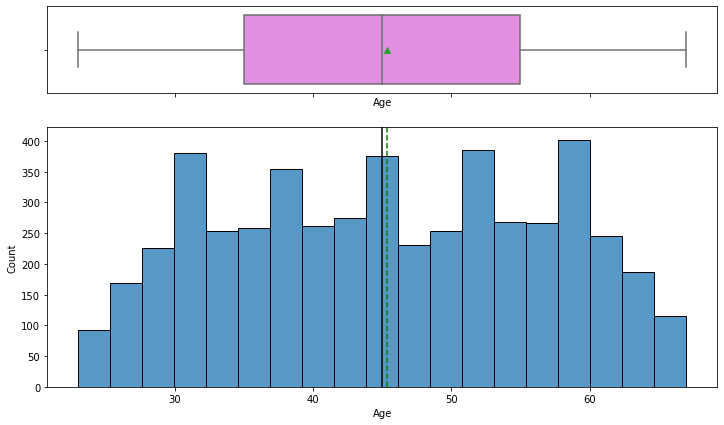

In [ ]:
histogram_boxplot(loans,'Age')

# Age is uniformly distributed

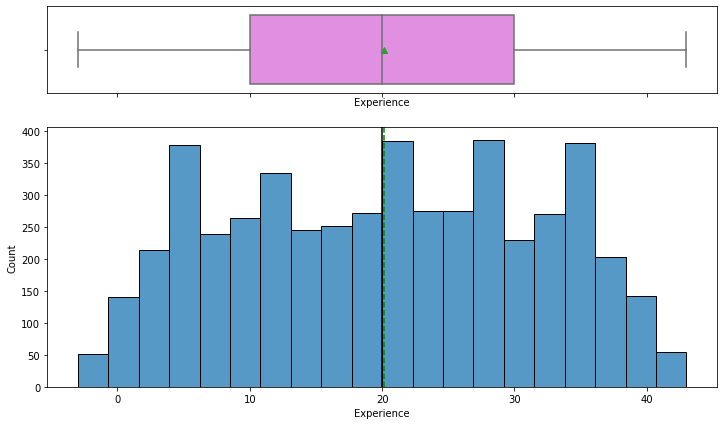

In [ ]:
histogram_boxplot(loans,'Experience')

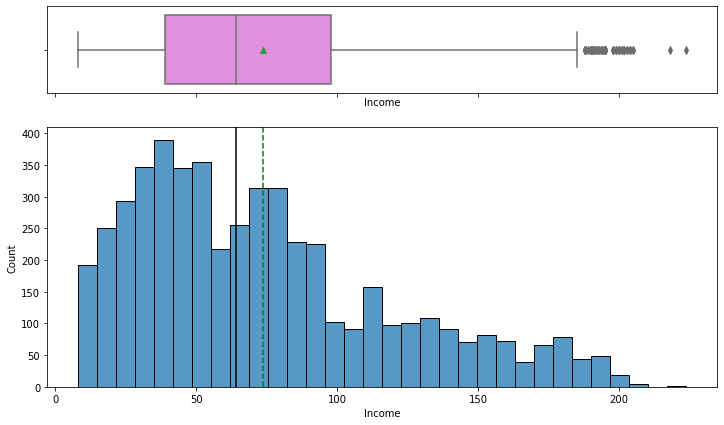

In [ ]:
histogram_boxplot(loans,'Income')
# the data is right skewed. Majority of customers have  income <=100 k

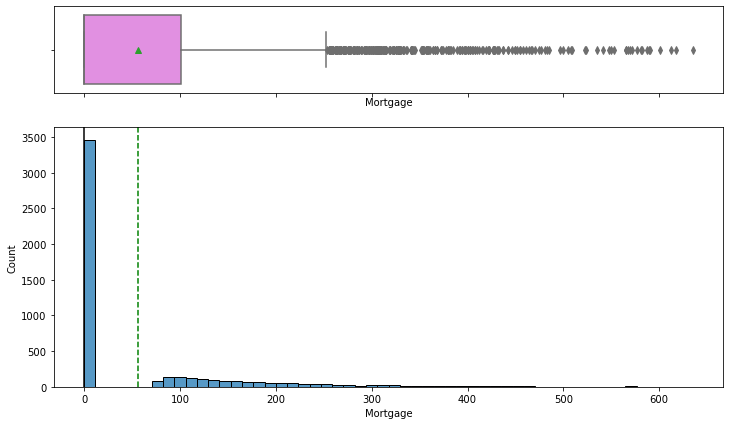

In [ ]:
histogram_boxplot(loans,'Mortgage')
# Majority of borrowers have zero mortgage

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
 14  Edu                 5000 non-null   object 
dtypes: float64(1), int64(13), object(1)
memory usage: 586.1

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Edu', ylabel='Income'>

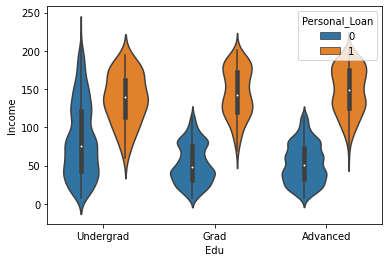

In [ ]:
#sns.countplot( loans['Age'], hue=loans['Personal_Loan'])

sns.violinplot(loans['Edu'], loans['Income'], hue=loans['Personal_Loan'])

# Customers with a personal loan have higher median incomes .
#The likelihood of a customer applying for a loan is higher when the income range is high.



/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family', ylabel='Income'>

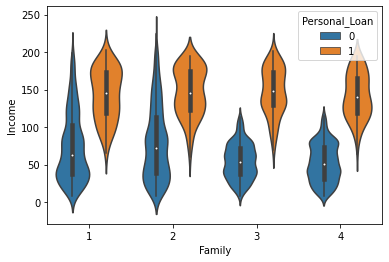

In [ ]:
sns.violinplot( loans['Family'],loans['Income'], hue=loans['Personal_Loan'])
# C

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family', ylabel='CCAvg'>

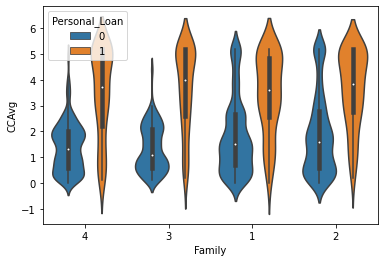

In [ ]:
sns.violinplot( loans['Family'],loans['CCAvg'], hue=loans['Personal_Loan'])

<AxesSubplot:>

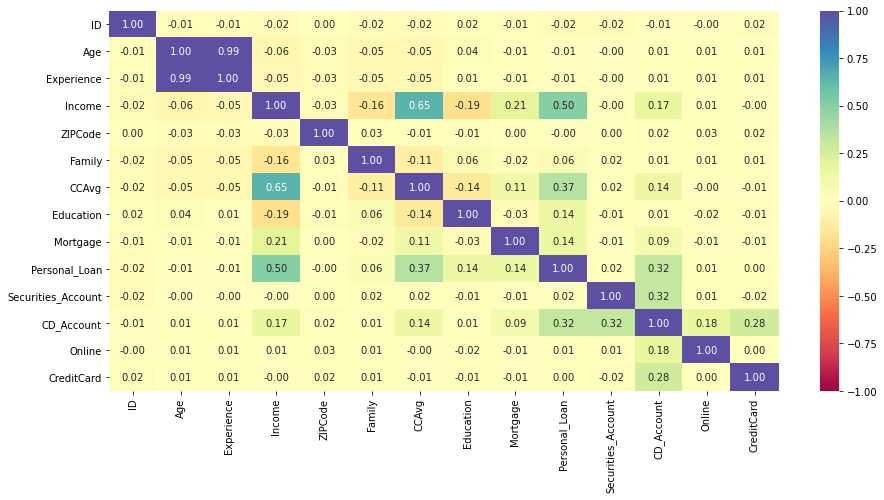

In [ ]:
# Correlation plot
plt.figure(figsize=(15, 7))
sns.heatmap(loans.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")


In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

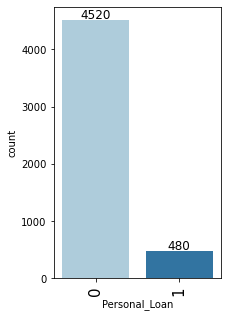

In [ ]:
labeled_barplot(loans,'Personal_Loan')


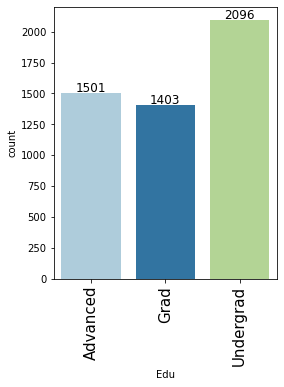

In [ ]:
labeled_barplot(loans,'Edu')

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


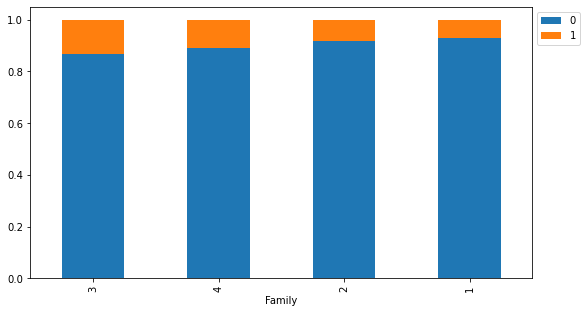

In [ ]:
stacked_barplot(loans,'Family','Personal_Loan')

# 3 and 4 family members appear to have a slightly higher share of personal loans.

Securities_Account     0    1   All
Family                             
All                 4478  522  5000
1                   1330  142  1472
4                   1083  139  1222
2                   1161  135  1296
3                    904  106  1010
------------------------------------------------------------------------------------------------------------------------


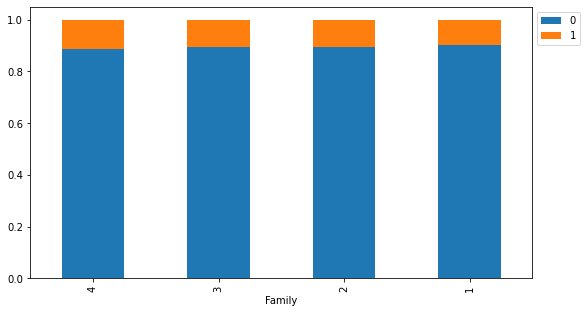

In [ ]:
stacked_barplot(loans,'Family','Securities_Account')

CD_Account     0    1   All
Family                     
All         4698  302  5000
1           1389   83  1472
3            928   82  1010
4           1152   70  1222
2           1229   67  1296
------------------------------------------------------------------------------------------------------------------------


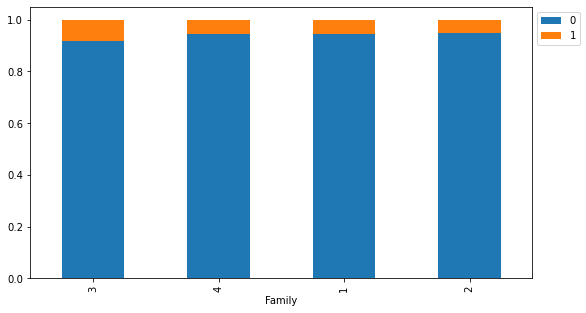

In [ ]:
stacked_barplot(loans,'Family','CD_Account')
# 3 and 4 family members have higher pct of CD accounts

Online     0     1   All
Family                  
All     2016  2984  5000
1        589   883  1472
2        548   748  1296
4        480   742  1222
3        399   611  1010
------------------------------------------------------------------------------------------------------------------------


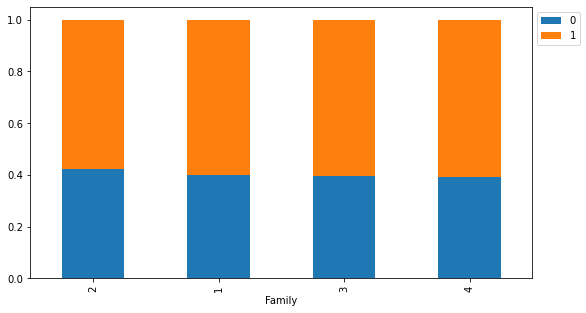

In [ ]:
stacked_barplot(loans,'Family','Online')

CD_Account     0    1   All
CreditCard                 
All         4698  302  5000
1           1230  240  1470
0           3468   62  3530
------------------------------------------------------------------------------------------------------------------------


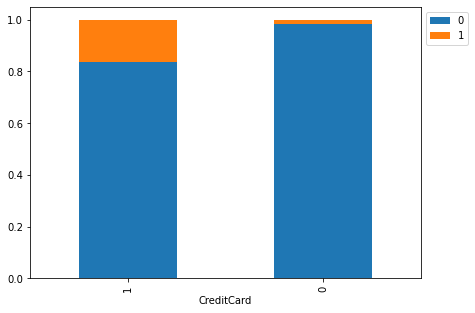

In [ ]:
stacked_barplot(loans,'CreditCard','CD_Account')

# Summary of EDA :
    
     
i) Income and personal Loan have a correlation of 0.5, which indicates that the higher the income, the higher the chances of having a persona loan.
ii) Income and Credit card Avg spending per month have a correlation of 0.65, which indicates the higher the income, the higher the chances of average credit card spending per month.
iii) Personal loan and credit card avg spending per month have a positive correlation of 0.37, indicating customers like high credit card avg spending have a good likelihood of getting personal loan. 
iv) CD account and securities account have a positive correlation of 0.32.
v) CD account and personal loan have a positive correlation of 0.32, indicating customers with CD account  are likely to be candidates for personal loan. 
vi) CD account and credit card have a positive colrrelation of 0.28
vii) Customers with CD account have a likely hood to have acredit card account.
viii) Personal Loan vs Income: 0.5 , suggests that of all the variables personal loan is more correlated with I ncome.
ix) Personal Loan vs CC Avg spending per month : 0.37, is a strong positive correlation

    

#Pre-processing data: 
    

In [ ]:
# Set zero as floor for experience to remove negative values
loans['Exp'] = loans['Experience'].apply(lambda x : 0 if x<0 else x)
loans.drop('Experience',axis=1, inplace=True)

In [ ]:
# Preprocessing of data.

# convert fields : Zipcode, Family,ID  to strings.

loans['ID'] = loans['ID'].astype('str')
loans['ZIPCode'] = loans['ZIPCode'].astype('str')
loans['Family'] = loans['Family'].astype('str')

In [ ]:
# drop columns that do not help.
# Education column is redundant.
# Too many unique zipcodes.
loans.drop('Education', axis=1 , inplace=True)
loans.drop('ID', axis=1, inplace=True)
loans.drop('ZIPCode', axis=1, inplace=True)

In [ ]:
loans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   object 
 3   CCAvg               5000 non-null   float64
 4   Mortgage            5000 non-null   int64  
 5   Personal_Loan       5000 non-null   int64  
 6   Securities_Account  5000 non-null   int64  
 7   CD_Account          5000 non-null   int64  
 8   Online              5000 non-null   int64  
 9   CreditCard          5000 non-null   int64  
 10  Edu                 5000 non-null   object 
 11  Exp                 5000 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 468.9+ KB


In [ ]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0
CreditCard,5000.0,0.294000,0.455637,0.0,0.0,0.0,1.0,1.0
Exp,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0


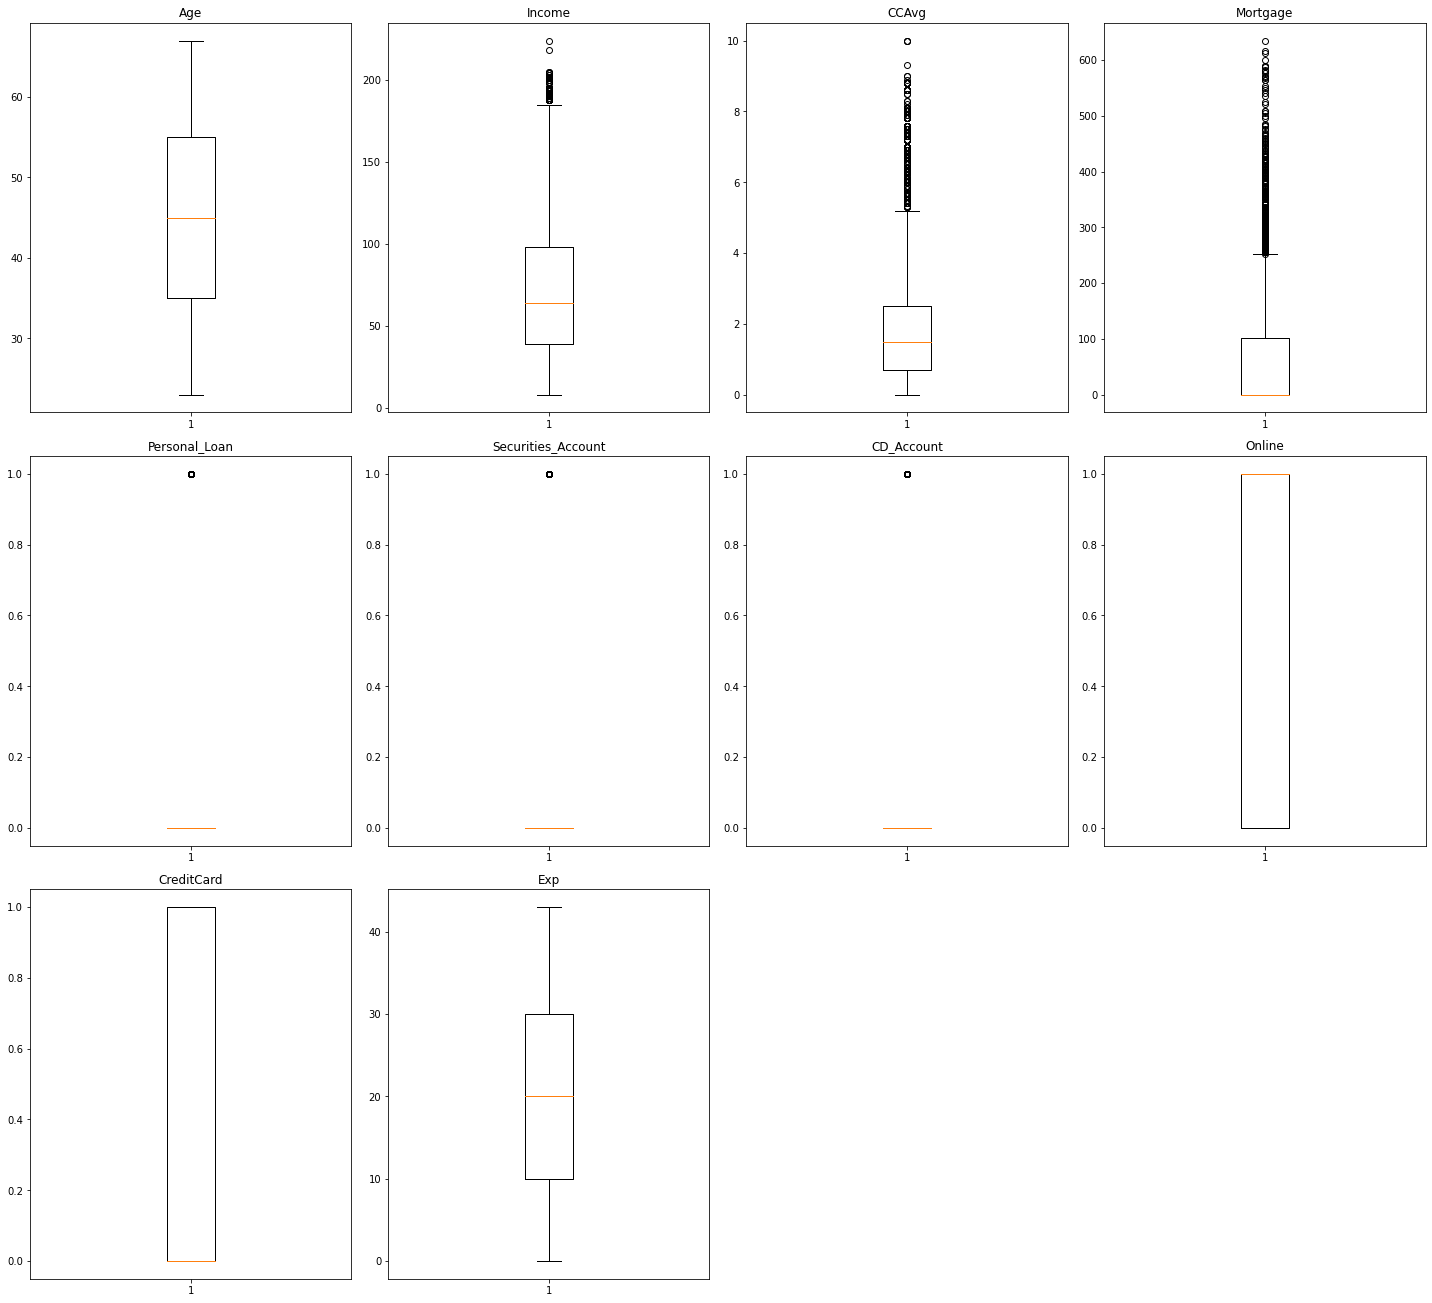

In [ ]:
# Outlier detection. Use Box and Whisker plot to detect outliers
numerical_col = loans.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(loans[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
# CCAvg , Mortgage, Income  has outliers.
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
 
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df




In [ ]:
# Set a cap of income
treat_outliers(loans,'Income' )

,Age,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Exp
0,25,49.0,4,1.6,0,0,1,0,0,0,1
1,45,34.0,3,1.5,0,0,1,0,0,0,19
2,39,11.0,1,1.0,0,0,0,0,0,0,15
3,35,100.0,1,2.7,0,0,0,0,0,0,9
4,35,45.0,4,1.0,0,0,0,0,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40.0,1,1.9,0,0,0,0,1,0,3
4996,30,15.0,4,0.4,85,0,0,0,1,0,4
4997,63,24.0,2,0.3,0,0,0,0,0,0,39
4998,65,49.0,3,0.5,0,0,0,0,1,0,40


In [ ]:
# Set a cap to CCAVG
treat_outliers(loans,'CCAvg' )


,Age,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Edu,Exp
0,25,49,4,1.6,0,0,1,0,0,0,Undergrad,1
1,45,34,3,1.5,0,0,1,0,0,0,Undergrad,19
2,39,11,1,1.0,0,0,0,0,0,0,Undergrad,15
3,35,100,1,2.7,0,0,0,0,0,0,Grad,9
4,35,45,4,1.0,0,0,0,0,0,1,Grad,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,0,0,0,0,1,0,Advanced,3
4996,30,15,4,0.4,85,0,0,0,1,0,Undergrad,4
4997,63,24,2,0.3,0,0,0,0,0,0,Advanced,39
4998,65,49,3,0.5,0,0,0,0,1,0,Grad,40


In [ ]:
# Set a cap to Mortgage
treat_outliers(loans,'Mortgage' )

,Age,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Edu,Exp
0,25,49,4,1.6,0.0,0,1,0,0,0,Undergrad,1
1,45,34,3,1.5,0.0,0,1,0,0,0,Undergrad,19
2,39,11,1,1.0,0.0,0,0,0,0,0,Undergrad,15
3,35,100,1,2.7,0.0,0,0,0,0,0,Grad,9
4,35,45,4,1.0,0.0,0,0,0,0,1,Grad,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,0.0,0,0,0,1,0,Advanced,3
4996,30,15,4,0.4,85.0,0,0,0,1,0,Undergrad,4
4997,63,24,2,0.3,0.0,0,0,0,0,0,Advanced,39
4998,65,49,3,0.5,0.0,0,0,0,1,0,Grad,40


In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   object 
 3   CCAvg               5000 non-null   float64
 4   Mortgage            5000 non-null   float64
 5   Personal_Loan       5000 non-null   int64  
 6   Securities_Account  5000 non-null   int64  
 7   CD_Account          5000 non-null   int64  
 8   Online              5000 non-null   int64  
 9   CreditCard          5000 non-null   int64  
 10  Edu                 5000 non-null   object 
 11  Exp                 5000 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 468.9+ KB


In [ ]:
from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

from sklearn.model_selection import train_test_split


In [ ]:
data = loans.copy()

In [ ]:
X = data.drop(["Personal_Loan"], axis=1)
Y = data["Personal_Loan"]


X = pd.get_dummies(X, drop_first=False)



In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   CCAvg               5000 non-null   float64
 3   Mortgage            5000 non-null   float64
 4   Securities_Account  5000 non-null   int64  
 5   CD_Account          5000 non-null   int64  
 6   Online              5000 non-null   int64  
 7   CreditCard          5000 non-null   int64  
 8   Exp                 5000 non-null   int64  
 9   Family_1            5000 non-null   uint8  
 10  Family_2            5000 non-null   uint8  
 11  Family_3            5000 non-null   uint8  
 12  Family_4            5000 non-null   uint8  
 13  Edu_Advanced        5000 non-null   uint8  
 14  Edu_Grad            5000 non-null   uint8  
 15  Edu_Undergrad       5000 non-null   uint8  
dtypes: flo

In [ ]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.30, random_state=1)

In [ ]:
X.head()

,Age,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Exp,Family_1,Family_2,Family_3,Family_4,Edu_Advanced,Edu_Grad,Edu_Undergrad
0,25,49,1.6,0.0,1,0,0,0,1,0,0,0,1,0,0,1
1,45,34,1.5,0.0,1,0,0,0,19,0,0,1,0,0,0,1
2,39,11,1.0,0.0,0,0,0,0,15,1,0,0,0,0,0,1
3,35,100,2.7,0.0,0,0,0,0,9,1,0,0,0,0,1,0
4,35,45,1.0,0.0,0,0,0,1,8,0,0,0,1,0,1,0


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [ ]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

In [ ]:
#print variable names and the coefficients 

list_coeff_var= list(zip(lg.coef_, X_train))

# List the coefficients with variable name.
list_coeff_var.sort(reverse=True)
list_coeff_var

[(array([-1.53339953e-02,  5.77667198e-02,  5.07138409e-01,  1.31376828e-03,
         -7.18881410e-01,  2.95977711e+00, -4.97586767e-01, -7.60047628e-01,
          2.36263048e-02, -9.81805525e-01, -1.01535126e+00,  1.42585600e+00,
          5.71300756e-01,  1.41493086e+00,  1.18797297e+00, -2.60290386e+00]),
  'Age')]

In [ ]:
 # let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,Age,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Exp,Family_1,Family_2,Family_3,Family_4,Edu_Advanced,Edu_Grad,Edu_Undergrad,Intercept
Coefficients,-0.015334,0.057767,0.507138,0.001314,-0.718881,2.959777,-0.497587,-0.760048,0.023626,-0.981806,-1.015351,1.425856,0.571301,1.414931,1.187973,-2.602904,-9.431998


In [ ]:
# Observations on the coefficients:
# Coefficients for features:  Age, Securities Acct, Online , Creditcard with other banks, Family size 1 and 2, Under grad are
# Negative. That means a positive increase in these variables decrease the probability of a personal loan borrowers.
# Coeffecients for  Income, Credit Card Avg spending, Mortgage, Family size of 3 and 4,  Customers with CD accounts 
# , Advanfed and Graduate level educated borrowers are positive. A positive increase for these values will increase the likelihood of a customer getting a personal loan.

# The strongest variables predicting positively whether a customer would apply for a personal loan  are 
#  CD account flag, family of 3 and 4, Graduate borrower, Advanced education borrower members , CC spending, followed by income and mortgage

# The strongest negative variables are : Family size of Undergraduate educated customer, 1, 2.

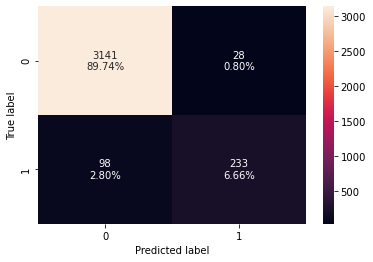

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)
print("Test set performance:")
log_reg_model_train_perf


Test set performance:


,Accuracy,Recall,Precision,F1
0,0.964,0.703927,0.89272,0.787162


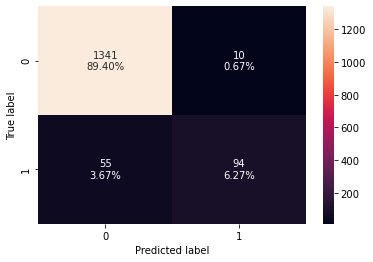

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf



Test set performance:


,Accuracy,Recall,Precision,F1
0,0.956667,0.630872,0.903846,0.743083


In [ ]:
# On the test dataset while accuracy is high and precision is high.
# Recall percentage is low (TP/(TP+FN) and F1 score is low.  
# Low Recall is not a good indicator of model performance
# To improve the performance of model , the optimal threshold that satisfies both Precision and recall need to be determined


In [ ]:
# ROC  : Area under the curve 

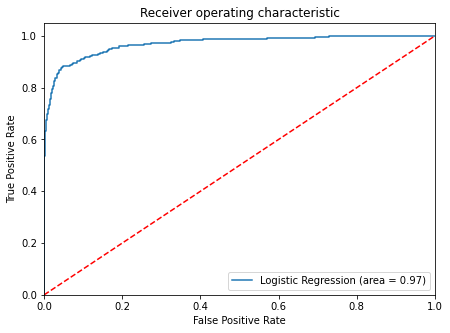

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

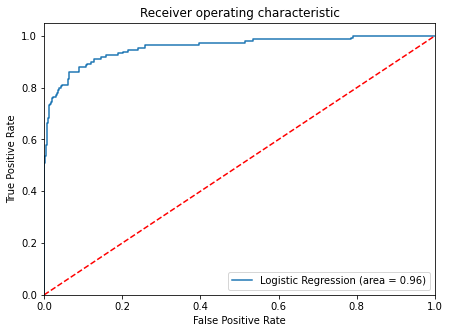

In [ ]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.1712880218480928


In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.944857,0.879154,0.655405,0.750968


In [ ]:
# checking model performance for this mode
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_test_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.94,0.812081,0.661202,0.728916


In [ ]:
# Reducing the threshold to 0.17 improves recall , but lowers precision and F1 statistic for both Test and train datasets


In [ ]:
# PLOT PRECISION VS RECALL curve, and get the optimal threshold where both curves meet.

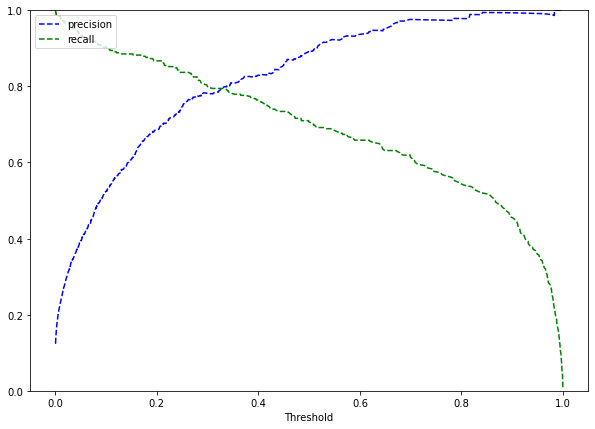

In [ ]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
# At about 0.35 threshold we'll have a balanced recall and precision.

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_3 = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=0.35
)
print("Training performance:")
log_reg_model_train_perf_threshold_3

Training performance:


,Accuracy,Recall,Precision,F1
0,0.961714,0.779456,0.808777,0.793846


In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_3 = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=0.35
)
print("Training performance:")
log_reg_model_test_perf_threshold_3

Training performance:


,Accuracy,Recall,Precision,F1
0,0.96,0.718121,0.856,0.781022


In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_3.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.11 Threshold",
    "Logistic Regression-0.3 Threshold"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.11 Threshold,Logistic Regression-0.3 Threshold
Accuracy,0.964000,0.944857,0.961714
Recall,0.703927,0.879154,0.779456
Precision,0.892720,0.655405,0.808777
F1,0.787162,0.750968,0.793846


In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_3.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.11 Threshold",
    "Logistic Regression-0.3 Threshold"
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,0,0,0
Accuracy,0.956667,0.940000,0.960000
Recall,0.630872,0.812081,0.718121
Precision,0.903846,0.661202,0.856000
F1,0.743083,0.728916,0.781022


In [ ]:
# observations on the logistic regression model :

# i)  Model 1 with 0.5 threshold has higher recall pct on training dataset, it fell down to 0.63 on test dataset.
# ii) Model 1 with 0.5 threshold has high accuracy and precision rates on both training and test datasets

# iii) Model 2 , aimed at lower threshold of 0.17, improves recall but reduces precision  as well as F1 score

# A similar trend is observed on test dataset. Also the F1 score reduced, indicating not a good candidate for mode.


# iv) Model 3, using a threshold of 0.35, maintained the accuracy, while balancing precision and recall, with an improved F1 statistoc of 0.69.

# Model 3 is the better model of all models.

In [ ]:
#### DECISION TREE CLASSIFIER

In [ ]:
# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

In [ ]:
# Use GINI Impurity as measurement methodology while growing a tree.
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [ ]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

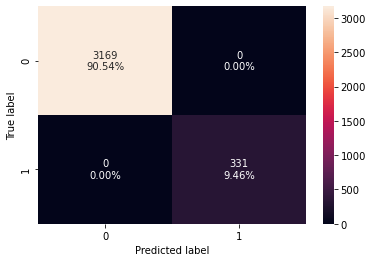

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

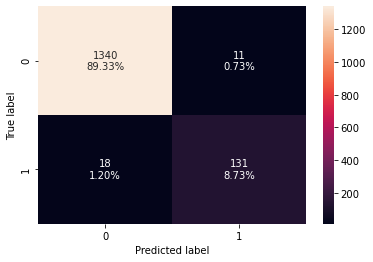

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8791946308724832


In [ ]:
# This is an indication that the model is functioning well on train dataset but not on test dataset.
# The tree has been overfit. to confirm this do a visualization of the tree.
# A well functioning classification function satisfies both higher recall and higher accuracy.

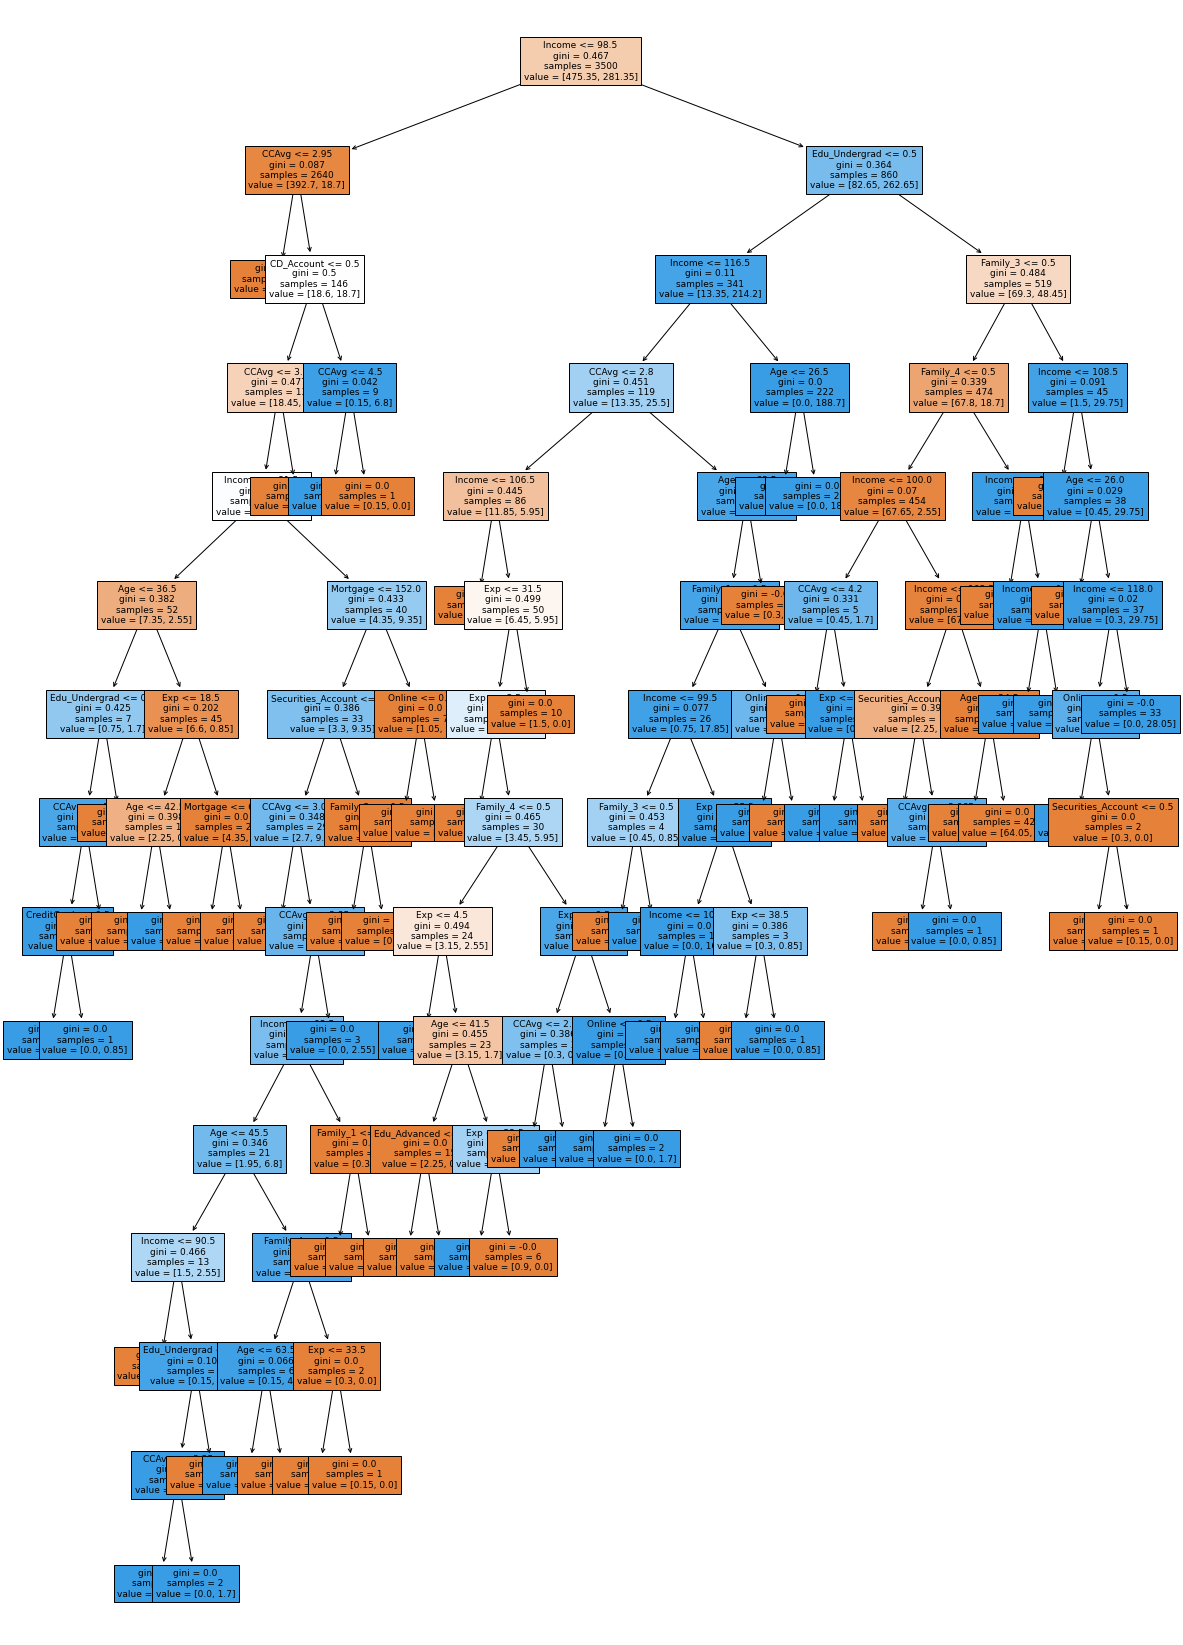

In [ ]:
## creating a list of column names
feature_names = X_train.columns.to_list()

plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# the classifier algorithm Appears to be overfitting the tree to fit training dataset 
# but underperforming on the test dataset


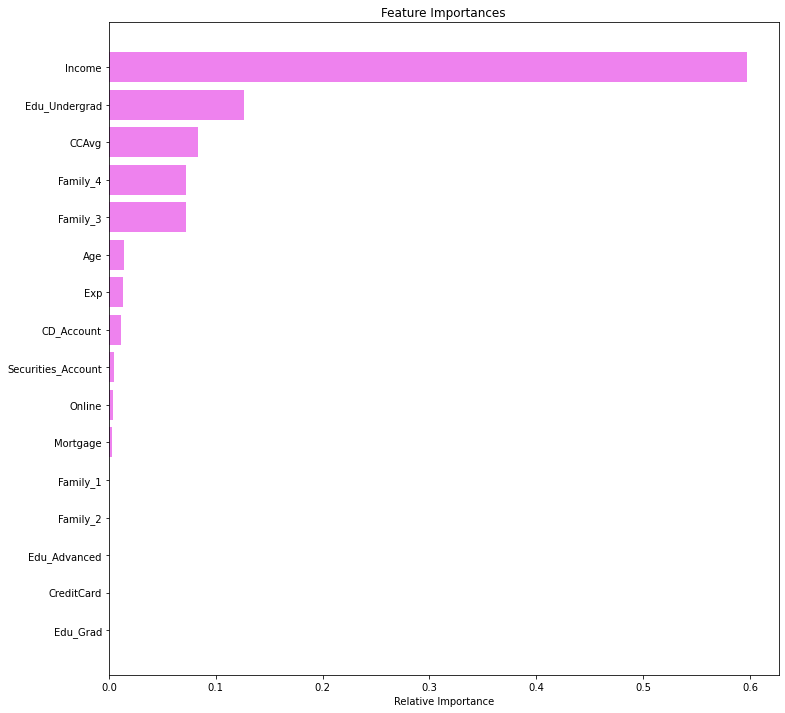

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# Reducing the overfitting by passing hyper parameters


In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=1e-05, random_state=1)

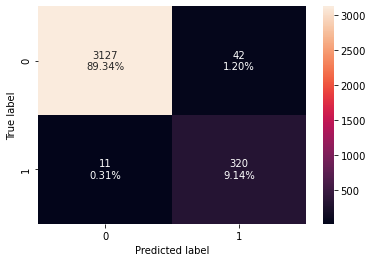

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9667673716012085


In [ ]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.8993288590604027


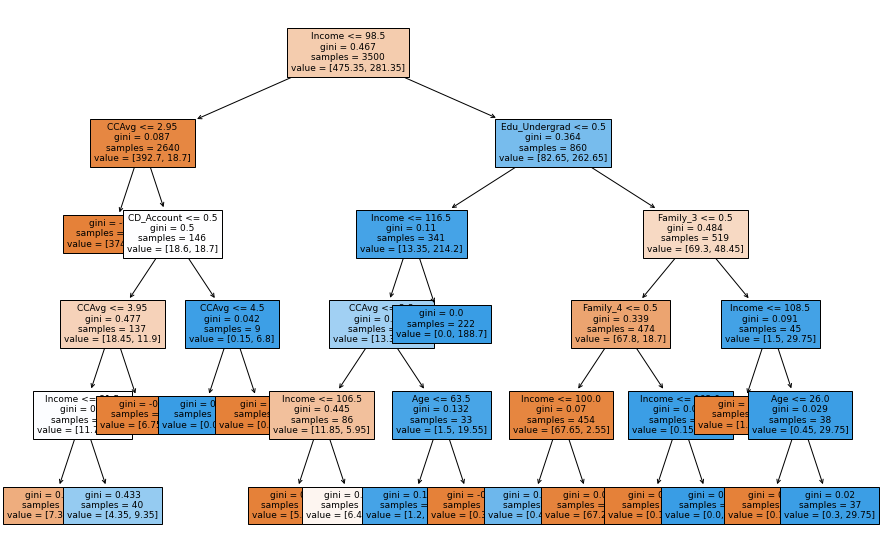

In [ ]:
## creating a list of column names
feature_names = X_train.columns.to_list()

plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

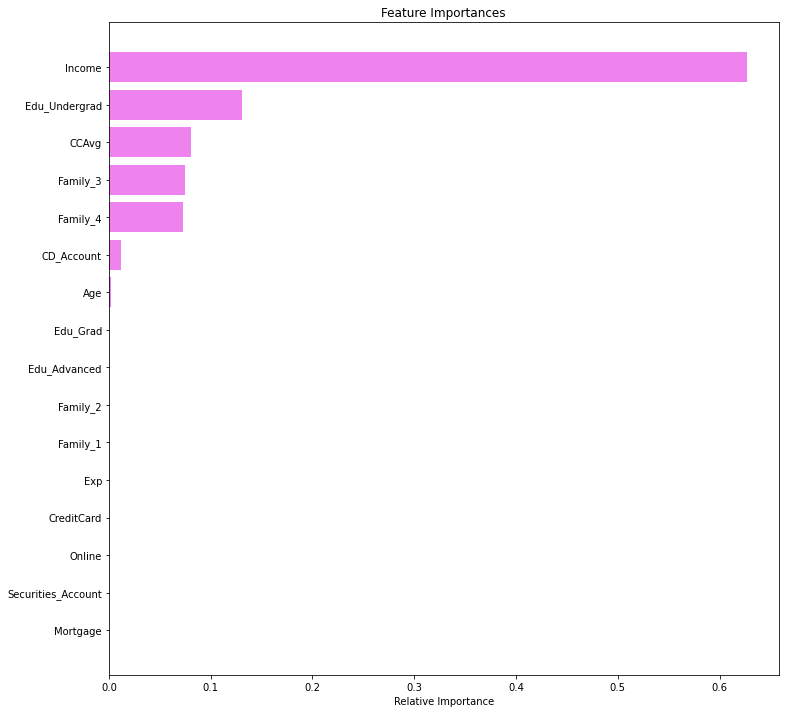

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# Observations : Income , Undergrad education , Average credit card spend per month, Family 3 and 4 are the import variables.
# Income is the most import classifier per decision tree model.

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)



                         Imp
Income              0.626664
Edu_Undergrad       0.131113
CCAvg               0.080733
Family_3            0.074802
Family_4            0.072528
CD_Account          0.011700
Age                 0.002460
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000
Exp                 0.000000
Family_1            0.000000
Family_2            0.000000
Edu_Advanced        0.000000
Edu_Grad            0.000000


In [ ]:
# the pruned decision tree provides better recall score, but doesnt improve the accuracy of the classification
# Running the unpruned tree on the test data, showed greater accuracy, but lesser recall score
# Running the pruned tree on teh test data, showed a significant improvement in recall score at the improvement of accuracy


<AxesSubplot:>

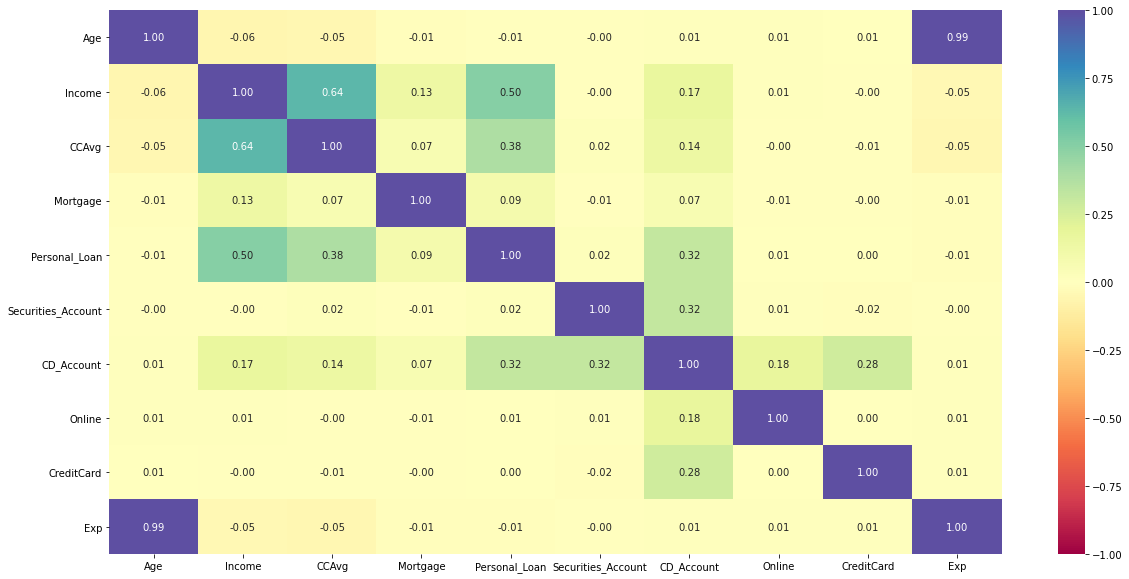

In [ ]:
# Correlation plot
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")



# Comparison of logistic regression output and pruned decision tree.

# Logistic regression :

i) The best model is where the probabiliby threshold is set to 0.3 to indicate whether a customer is going to a personal loan customer.
ii) The strongest variables predicting whether a customer would apply for a personal loan  are CD account, Graduate and Advanced educated customers, family of 3 and 4 members , Credit card average spending per month, Income, mortgage.


# Decision tree:
i) The pruned tree, at a maximum depth of 5 (using CCAVG) as decision variable , still has a gini impurity of ~ 0.45 on the blue node. 
ii) The pruning improves the recall score at a significant reduction in accurcacy  (TP + TN)/ (TP + FN + TN +FP)
iii) The most important features are Income, Graduate Education,CC avg spending, Family3, Family4. 


# Correlation matrix :

i) According to correlation matrix, the 5 variables that are correlated with personal loan in decreasing order 
from highest to lowest are: Income, CC AVg, CD_Acct, Mortgage, Securities account.
    

Logistic regression misses income as an important variable, while decision tree misses customer deposit account as an important
variable.
  
        


# Key Insights for Marketing team:

 i) Since customers with existing CD accounts are likely those convert to personal loan, target those customers
 ii) Customers with higher incomes are likely to apply for a personal loan, target customers with  income range above 150k per annum
iii) Customers with higher credit card spending are likely to apply for a personal loan. Target customers with  credit card spending above 3.5k
 iv) Target customers with family size of 3 or 4 as they have better conversion rate to personal loan.
v) Target customers with Mortgages as they are likely to apply for a personal loan.
vi) Experience , online, and accounts with other bank issued credit cards do not improve the model performance.
vii) Target customers with Graduate and Advanced education levels.  With in Undergrad educated customers, target customers with higher income and credit card spending levels.
